# Longitudinal Data Analysis with `ehrapy` and `ehrdata`: SAITS on the PhysioNet Challenge Dataset

This comprehensive tutorial demonstrates advanced machine learning workflows on clinical time series data using:
- **EHRData** for structured longitudinal clinical data handling
- **PyPOTS** for state-of-the-art time series classification on partially-observed time series
- **ehrapy** for comprehensive data and representation exploration and visualization
- **PhysioNet 2012 Challenge** dataset for in-hospital mortality prediction

```{note}
If you're new to `ehrapy` and `ehrdata`, we strongly recommend to read [Getting started with ehrdata](https://ehrdata.readthedocs.io/en/latest/tutorials/getting_started.html) and [Introduction to ehrapy](https://ehrapy.readthedocs.io/en/latest/tutorials/notebooks/ehrapy_introduction.html).
```

## Overview

This tutorial is organized in two main parts:

**Part 1: Exploratory Data Analysis**

We begin with comprehensive data exploration to understand the dataset, patient characteristics, and temporal patterns:

1.1 **Comprehensive Data Inspection with ehrapy**
   - 1.1.1 Cohort Tracking with CohortTracker
   - 1.1.2 Missing Value Analysis
   - 1.1.3 Sankey Diagrams for Patient Flow
   - 1.1.4 Normalization

1.2 **Time-point representations**
   - New layer ``normalized_imputed`` via ``ep.pp.explicit_impute`` (value 0; analogous to mean impute for z-normalized data; ehrapy offers more choices and sophisticated methods)
   - Representations at hour 24 and hour 48: neighbors, Leiden clustering, UMAP colored by static variables (*Gender*, *ICUType*, *In-hospital_death*)

1.3 **Rank features groups**
   - Differential features across Leiden clusters; concludes the exploratory section

**Part 2: Machine Learning with SAITS**

After understanding the data through EDA, we build a predictive model:

2.1 **SAITS Model Setup**
   - Format data according to SAITS specifications; split into training, validation, and test sets
   - Train the SAITS architecture using PyPOTS; self-attention-based imputation for time series with missing values

2.3 **Model Evaluation**
   - Assess prediction performance with comprehensive metrics
   - Analyze model predictions and clinical relevance

2.4 **Exploring SAITS Representations**
   - Extract and visualize learned representations from the trained model
   - Compare with the simple time-based representations from EDA

2.5 **Cohort Tracking Summary**
   - Visualize how the cohort changed throughout the analysis pipeline

2.6 **Summary and Next Steps**
   - What We've Accomplished
   - Key Insights
   - Next Steps
   - Resources

**References:**
- PhysioNet 2012 Challenge: [Silva et al. 2012](https://physionet.org/content/challenge-2012/1.0.0/)
- SAITS: [Du et al. 2023](https://doi.org/10.1016/j.eswa.2023.119619) - "SAITS: Self-Attention-based Imputation for Time Series"
- PyPOTS Classification API (including SAITS): [PyPOTS docs](https://docs.pypots.com/en/latest/pypots.classification.html)


## Installation and Setup


In [ ]:
%pip install pypots

## Imports


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
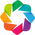


████████╗██╗███╗   ███╗███████╗    ███████╗███████╗██████╗ ██╗███████╗███████╗    █████╗ ██╗
╚══██╔══╝██║████╗ ████║██╔════╝    ██╔════╝██╔════╝██╔══██╗██║██╔════╝██╔════╝   ██╔══██╗██║
   ██║   ██║██╔████╔██║█████╗█████╗███████╗█████╗  ██████╔╝██║█████╗  ███████╗   ███████║██║
   ██║   ██║██║╚██╔╝██║██╔══╝╚════╝╚════██║██╔══╝  ██╔══██╗██║██╔══╝  ╚════██║   ██╔══██║██║
   ██║   ██║██║ ╚═╝ ██║███████╗    ███████║███████╗██║  ██║██║███████╗███████║██╗██║  ██║██║
   ╚═╝   ╚═╝╚═╝     ╚═╝╚══════╝    ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝╚══════╝╚══════╝╚═╝╚═╝  ╚═╝╚═╝
ai4ts v0.0.3 - building AI for unified time-series analysis, https://time-series.ai 



In [1]:
import os
import warnings

warnings.filterwarnings('ignore')

# PyPOTS requires this for scipy compatibility
os.environ["SCIPY_ARRAY_API"] = "1"

import ehrapy as ep
import ehrdata as ed
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from pypots.classification import SAITS
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)


## Load PhysioNet 2012 dataset

The Physionet 2012 challenge dataset is one of the built-in, ready-to-use datasets of `ehrdata` and can be loaded with one line of code:

In [2]:
edata = ed.dt.physionet2012(layer="tem_data")
edata

View of EHRData object with n_obs × n_vars × n_t = 11988 × 37 × 48
    obs: 'set', 'Age', 'Gender', 'Height', 'ICUType', 'SAPS-I', 'SOFA', 'Length_of_stay', 'Survival', 'In-hospital_death'
    var: 'Parameter'
    tem: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47'
    layers: 'tem_data'
    shape of .tem_data: (11988, 37, 48)

In [ ]:
# populate the empty X layer with zeros
edata = edata.copy()
edata.X = np.zeros((edata.shape[0], edata.shape[1]))

In [7]:
print(f"Dataset shape: {edata.shape}")
print(f"Number of patients: {edata.n_obs}")
print(f"Number of longitudinalvariables: {edata.n_vars}")
print(f"Number of time points: {edata.n_t}")
print(f"\nObservation metadata columns: {list(edata.obs.columns)}")
print(f"\nVariable names: {list(edata.var_names[:10])}...")  # Show first 10

Dataset shape: (11988, 37, 48)
Number of patients: 11988
Number of longitudinalvariables: 37
Number of time points: 48

Observation metadata columns: ['set', 'Age', 'Gender', 'Height', 'ICUType', 'SAPS-I', 'SOFA', 'Length_of_stay', 'Survival', 'In-hospital_death']

Variable names: ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2']...


Lets inspect the static data:

In [8]:
edata.obs.head()


,set,Age,Gender,Height,ICUType,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
RecordID,,,,,,,,,,
132539,set-a,54.0,0.0,-1.0,4.0,6,1,5,-1,0
132540,set-a,76.0,1.0,175.3,2.0,16,8,8,-1,0
132541,set-a,44.0,0.0,-1.0,3.0,21,11,19,-1,0
132543,set-a,68.0,1.0,180.3,3.0,7,1,9,575,0
132545,set-a,88.0,0.0,-1.0,3.0,17,2,4,918,0


And have a look at the dynamic variables:


In [9]:
ed.infer_feature_types(edata, layer="tem_data")

! Feature  was detected as categorical features stored numerically.Please verify and adjust if necessary using `ed.replace_feature_types`.


 Detected feature types for EHRData object with 11988 obs and 37 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ ALP
║   ╠══ ALT
║   ╠══ AST
║   ╠══ Albumin
║   ╠══ BUN
║   ╠══ Bilirubin
║   ╠══ Cholesterol
║   ╠══ Creatinine
║   ╠══ DiasABP
║   ╠══ FiO2
║   ╠══ GCS
║   ╠══ Glucose
║   ╠══ HCO3
║   ╠══ HCT
║   ╠══ HR
║   ╠══ K
║   ╠══ Lactate
║   ╠══ MAP
║   ╠══ MechVent
║   ╠══ Mg
║   ╠══ NIDiasABP
║   ╠══ NIMAP
║   ╠══ NISysABP
║   ╠══ Na
║   ╠══ PaCO2
║   ╠══ PaO2
║   ╠══ Platelets
║   ╠══ RespRate
║   ╠══ SaO2
║   ╠══ SysABP
║   ╠══ Temp
║   ╠══ TroponinI
║   ╠══ TroponinT
║   ╠══ Urine
║   ╠══ WBC
║   ╠══ Weight
║   ╚══ pH
╚══ 🗂️ Categorical features

## Part 1: Exploratory Data Analysis

### 1.1 Comprehensive Data Inspection with ehrapy

We'll use ehrapy's powerful inspection tools to understand our cohort and data quality.


#### 1.1.1 Quality control metrics with ehrapy

Before diving into cohort tracking and missing value analysis, we compute quality control (QC) metrics using `ep.pp.qc_metrics`. This adds missing-value statistics and summary statistics (mean, median, std, etc.) to `edata.obs` and `edata.var`, which supports downstream filtering and interpretation. For longitudinal data we use the `tem_data` layer.

In [10]:
# Compute QC metrics on the temporal data layer
# Adds missing_values_abs, missing_values_pct, entropy_of_missingness to obs/var
# plus summary stats (mean, median, std, min, max) to var
obs_qc, var_qc = ep.pp.qc_metrics(edata, layer="tem_data")

# Show a preview of observation- and variable-level metrics
print("Observation-level QC metrics (first 5 rows):")
display(obs_qc.head())

print("\nVariable-level QC metrics (first 10 rows):")
display(var_qc)

Observation-level QC metrics (first 5 rows):


,missing_values_abs,missing_values_pct,entropy_of_missingness,unique_values_abs,unique_values_ratio
RecordID,,,,,
132539,1516,85.360360,0.600748,NaN,NaN
132540,1375,77.421171,0.770597,NaN,NaN
132541,1383,77.871622,0.762505,NaN,NaN
132543,1418,79.842342,0.725070,NaN,NaN
132545,1472,82.882883,0.660377,NaN,NaN



Variable-level QC metrics (first 10 rows):


,missing_values_abs,missing_values_pct,entropy_of_missingness,unique_values_abs,unique_values_ratio,coefficient_of_variation,is_constant,constant_variable_ratio,range_ratio,mean,median,standard_deviation,min,max,iqr_outliers
Parameter,,,,,,,,,,,,,,,
ALP,565999,98.362077,0.120597,NaN,NaN,1.458623,0.0,2.702703,3901.207763,120.142281,82.00,175.242311,8.00,4695.00,True
ALT,565729,98.315155,0.123359,NaN,NaN,3.123187,0.0,2.702703,4661.914393,362.919577,42.00,1133.465814,1.00,16920.00,True
AST,565728,98.314982,0.123370,NaN,NaN,3.266529,0.0,2.702703,7207.158151,504.997937,62.00,1649.590278,4.00,36400.00,True
Albumin,568184,98.741797,0.097461,NaN,NaN,0.225510,0.0,2.702703,148.754802,2.890663,2.90,0.651872,1.00,5.30,True
BUN,533750,92.757688,0.374902,NaN,NaN,0.831778,0.0,2.702703,769.177905,27.171867,20.00,22.600949,0.00,209.00,True
Bilirubin,565631,98.298125,0.124357,NaN,NaN,2.014253,0.0,2.702703,2890.170303,2.864883,0.90,5.770600,0.00,82.80,True
Cholesterol,574430,99.827258,0.018343,NaN,NaN,0.285582,0.0,2.702703,214.539768,155.682093,153.00,44.460024,28.00,362.00,True
Creatinine,533561,92.724843,0.376109,NaN,NaN,1.052263,0.0,2.702703,1493.335020,1.473213,1.00,1.550207,0.10,22.10,True
DiasABP,263572,45.804833,0.994916,NaN,NaN,0.219552,0.0,2.702703,458.459459,59.547250,58.00,13.073717,-1.00,272.00,True


We can see at a glance 
- what percentage of measurements are available on an observation (person) level 
- what percentage of measurements are available on a variable level

For the persons, we see from the sample of the first 5 individuals that the missing value percentage, or in other words the monitoring intensity, can vary.

Further, for the variables, information such as summary statistics such as the mean, and whether outliers are present.

Remember we consider values measured in hourly intervals for 48 hours;

Here, we note that the basic physiological measurements such as `DiasABP`, `HR`, `MAP`, `NIDiasABP`, `NIMAP`, `NISysABP`, `SysABP`, `Urine`, and `Weight` are most frequently recorded.

More specific measurements such as for instance `WBC` and `TroponinI` are less frequently measured.

#### 1.1.1 Cohort Tracking with CohortTracker


Let us examine the static information of the cohort in a bit more detail. This can be reported as a table using the `tableone` package, or visually using ehrapy's `CohortTracker`, which will be able to display further information at the end of the notebook.

In [11]:
from tableone import TableOne
tableone = TableOne(edata.obs, categorical=["set", "Gender", "ICUType", "In-hospital_death"])
display(tableone)

Missing        Overall
n                                                        11988
set, n (%)                        set-a            3997 (33.3)
                                  set-b            3993 (33.3)
                                  set-c            3998 (33.4)
Age, mean (SD)                                0    64.5 (17.2)
Gender, n (%)                     -1.0                12 (0.1)
                                  0.0              5259 (43.9)
                                  1.0              6717 (56.0)
Height, mean (SD)                             0    88.2 (86.1)
ICUType, n (%)                    1.0              1765 (14.7)
                                  2.0              2528 (21.1)
                                  3.0              4287 (35.8)
                                  4.0              3408 (28.4)
SAPS-I, mean (SD)                             0     14.3 (6.0)
SOFA, mean (SD)                               0      6.4 (4.2)
Length_of_stay, mean (SD)                     0    13.4 (12.8)
Survival, mean (SD)                           0  134.0 (372.8)
In-hospital_death, n (%)          0               10281 (85.8)
                                  1                1707 (14.2)
missing_values_abs, mean (SD)                 0  1415.5 (77.3)
missing_values_pct, mean (SD)                 0     79.7 (4.4)
entropy_of_missingness, mean (SD)             0      0.7 (0.1)
unique_values_abs, mean (SD)              11988      nan (nan)
unique_values_ratio, mean (SD)            11988      nan (nan)

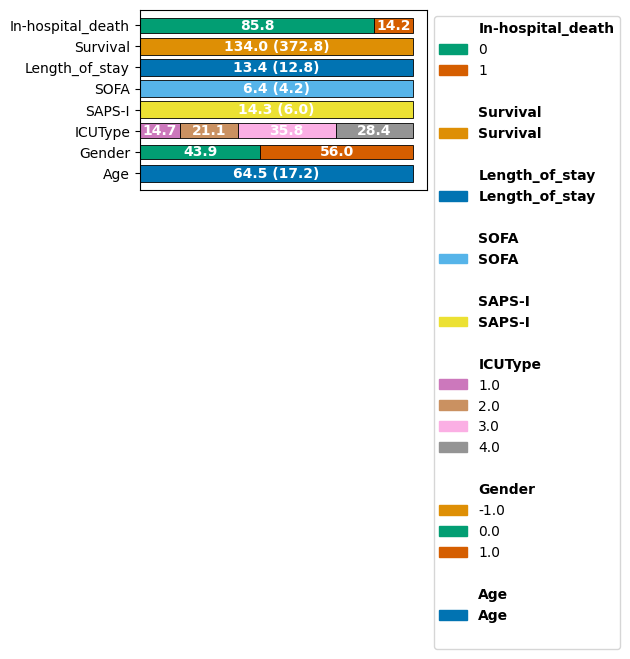

In [12]:
tracking_cols = ['Age', 'Gender', "ICUType", "SAPS-I", "SOFA", "Length_of_stay", "Survival", "In-hospital_death"]
categorical_cols = ['Gender', "ICUType", "In-hospital_death"]

ct = ep.tl.CohortTracker(edata, columns=tracking_cols, categorical=categorical_cols)
ct(edata, label="Initial Cohort", operations_done="Loaded PhysioNet 2012 dataset")
ct.plot_cohort_barplot()

We can observe that on average, patients are 64.5 years old upon ICU entry, with slightly more females (`0`) than males (`1`).

#### 1.1.2 Sankey Diagrams for Patient Flow

We can further inspect static variables with a Sankey diagram:

In [13]:
ep.pl.sankey_diagram(
    edata,
    columns=['Gender', 'In-hospital_death'],
    title="Patient Flow: Gender to Sepsis Status",
)


:Sankey   [source,target]   (value)

Where we can obtain a quick visual queue about e.g. the relation of `Gender` and `In-hospital_death`.

Here, there is no immediate indication that these two variables are strongly associated in our cohort.

We can also inspect variables longitudinally for how patients change along the time axis. A Sankey diagram is for categorical variables. Since our time-series data consists of continuous variables, we create a quick example with categorized values.

For this, let us explore the heart rate `HR`, which we bin for a rough overview into `low`, `normal`, `high`, and `missing`.

In [14]:
# create a new layer in edata
edata.layers["cat_hr"] = edata.layers["tem_data"].copy()

# fill the HR variable (index 14) with the categorical values
edata.layers["cat_hr"][:, 14, :] = np.where(edata.layers["tem_data"][:, 14, :] < 60, 0, edata.layers["cat_hr"][:, 14, :])
edata.layers["cat_hr"][:, 14, :] = np.where(edata.layers["tem_data"][:, 14, :] >= 100, 2, edata.layers["cat_hr"][:, 14, :]  )
edata.layers["cat_hr"][:, 14, :] = np.where((edata.layers["tem_data"][:, 14, :] >= 60) & (edata.layers["tem_data"][:, 14, :] <= 100), 1, edata.layers["cat_hr"][:, 14, :])
edata.layers["cat_hr"][:, 14, :] = np.where(np.isnan(edata.layers["tem_data"][:, 14, :]), 3, edata.layers["cat_hr"][:, 14, :])


Let's visualize these `HR` categories for the first 10 hours:

In [15]:
# plot the Sankey diagram
ep.pl.sankey_diagram_time(
    edata[:, :, :5],
    var_name="HR",
    layer='cat_hr',
    state_labels={0: "Low HR", 1: "Normal HR", 2: "High HR", 3: "Missing HR"},
    width=700,
)

:Sankey   [source,target]   (value)

We can see that most patients at hour 0 (leftmost) have no `HR` measurement. Further, most patients with measured `HR` display a normal measurement at hour 0.

We can observe that the fraction of patients with no `HR` measurement at every hour declines as their ICU stay procedes.

#### 1.1.3 Time Series Visualization

For exploring continuous variables across time, lineplots or timeseries plots are more suitable.

Let's explore for instance a few of the vital parameters for the two first patients:


In [16]:
vital_vars = ['HR', 'SaO2', 'Temp', 'NISysABP', 'NIDiasABP', 'RespRate']

ep.pl.timeseries(
    edata[:2],
    layer="tem_data",
    var_names=vital_vars,
)


:Layout
   .Overlay.Time_series_for_observation_132539 :Overlay
      .Curve.HR        :Curve   [time]   (value)
      .Curve.SaO2      :Curve   [time]   (value)
      .Curve.Temp      :Curve   [time]   (value)
      .Curve.NISysABP  :Curve   [time]   (value)
      .Curve.NIDiasABP :Curve   [time]   (value)
      .Curve.RespRate  :Curve   [time]   (value)
   .Overlay.Time_series_for_observation_132540 :Overlay
      .Curve.HR        :Curve   [time]   (value)
      .Curve.SaO2      :Curve   [time]   (value)
      .Curve.Temp      :Curve   [time]   (value)
      .Curve.NISysABP  :Curve   [time]   (value)
      .Curve.NIDiasABP :Curve   [time]   (value)
      .Curve.RespRate  :Curve   [time]   (value)

We can see that the measurements of vital signs can be very irregular, and different for different individuals; While individual `132540` had their `HR` constantly monitored, no data on their `RespRate` is available. Individual `132539` on the other hand has `HR` and `RespRate` data available, but multiple gaps where none of these values were acquired.

### 1.1.4 Normalization

As we also can see in the plot above, variables have different scales, which are further arbitrary by the units that is used.
To treat features equally in modelling, and to focus on within-feature deviation from "standard" instead of focusing on numeric magnitude, we normalize them. ehrapy offers multiple ways to do so, here we use robust scale norm for all variables.

In rest of notebook, we use normalized data.

In [17]:
edata.layers["norm_data"] = edata.layers["tem_data"].copy()


In [18]:
ep.pp.scale_norm(edata, layer="norm_data")

We add a **normalized_imputed** layer by filling missing values in the normalized data with 0 using `ep.pp.explicit_impute`. For z-normalized data, the mean is 0, so replacing missings with 0 is analogous to mean imputation. Ehrapy offers more choices and sophisticated imputation methods (e.g. iterative/model-based) for settings where a simple fill value is not appropriate.

And if we inspect this timeseries plot again:

In [19]:
vital_vars = ['HR', 'SaO2', 'Temp', 'NISysABP', 'NIDiasABP', 'RespRate']
ep.pl.timeseries(
    edata[:2],
    layer="norm_data",
    var_names=vital_vars,
)


:Layout
   .Overlay.Time_series_for_observation_132539 :Overlay
      .Curve.HR        :Curve   [time]   (value)
      .Curve.SaO2      :Curve   [time]   (value)
      .Curve.Temp      :Curve   [time]   (value)
      .Curve.NISysABP  :Curve   [time]   (value)
      .Curve.NIDiasABP :Curve   [time]   (value)
      .Curve.RespRate  :Curve   [time]   (value)
   .Overlay.Time_series_for_observation_132540 :Overlay
      .Curve.HR        :Curve   [time]   (value)
      .Curve.SaO2      :Curve   [time]   (value)
      .Curve.Temp      :Curve   [time]   (value)
      .Curve.NISysABP  :Curve   [time]   (value)
      .Curve.NIDiasABP :Curve   [time]   (value)
      .Curve.RespRate  :Curve   [time]   (value)

## 1.2 Time-point representations

We build representations at **hour 24** and **hour 48** by slicing the `normalized_imputed` layer at those time indices to obtain 2D patient×feature matrices. For each time point we compute a neighborhood graph, and perform Leiden clustering. We can then vizualise the neighborhood graph as a UMAP.

First we need an imputation approach before computing the neighborhood graph; for simplicity, we use here a simple mean imputation strategy. There are exist also other, more sophisticated approaches.

In [20]:
edata.layers["normalized_imputed"] = edata.layers["norm_data"].copy()
ep.pp.simple_impute(edata, strategy="mean",layer="normalized_imputed")

[<Axes: title={'center': 'Gender'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'ICUType'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'In-hospital_death'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'hour_24_leiden'}, xlabel='UMAP1', ylabel='UMAP2'>]

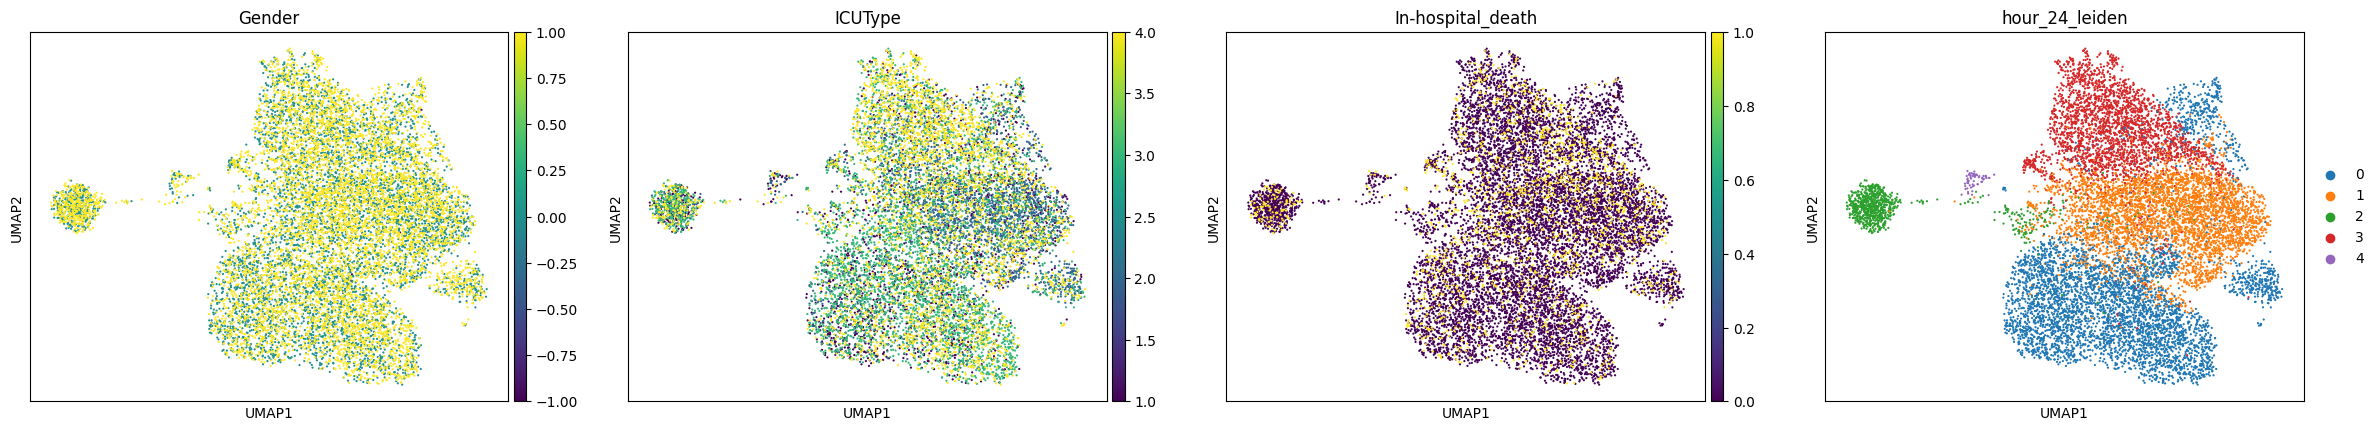

In [21]:
# Representation at hour 24 put into .obsm of edata
edata.obsm["hour_24"] = edata.layers["normalized_imputed"][:, :, 23]

ep.pp.neighbors(edata, n_neighbors=15, use_rep="hour_24", key_added="hour_24_neighbors")
ep.tl.leiden(edata, neighbors_key="hour_24_neighbors", key_added="hour_24_leiden", resolution=0.2)
ep.tl.umap(edata, neighbors_key="hour_24_neighbors")
ep.pl.umap(edata, color=["Gender", "ICUType", "In-hospital_death", "hour_24_leiden"], show=False)

[<Axes: title={'center': 'Gender'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'ICUType'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'In-hospital_death'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'hour_48_leiden'}, xlabel='UMAP1', ylabel='UMAP2'>]

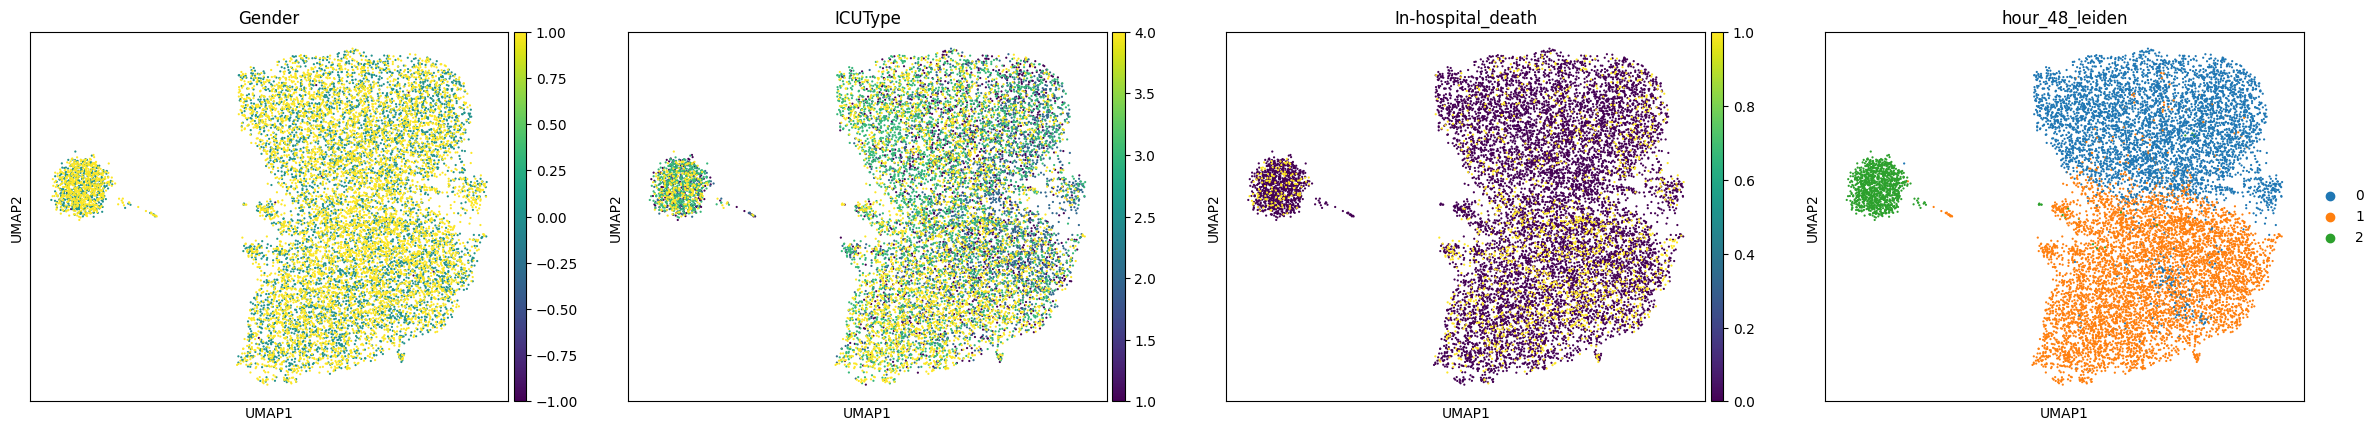

In [22]:
# Representation at hour 24 put into .obsm of edata
edata.obsm["hour_48"] = edata.layers["normalized_imputed"][:, :, 47]

ep.pp.neighbors(edata, n_neighbors=15, use_rep="hour_48", key_added="hour_48_neighbors")
ep.tl.leiden(edata, neighbors_key="hour_48_neighbors", key_added="hour_48_leiden", resolution=0.2)
ep.tl.umap(edata, neighbors_key="hour_48_neighbors")
ep.pl.umap(edata, color=["Gender", "ICUType", "In-hospital_death", "hour_48_leiden"], show=False)

There appears no clear visual substructure in this 2D projection within the patients at hour 24 or 48 with this simple strategy.

Let us also have a look at the unsupervised leiden clustering.

## 1.3 Rank features groups

We identify static features that differ across Leiden clusters using `ep.tl.rank_features_groups` on the hour-48 representation. This concludes the exploratory section.

! Feature  was detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Detected no columns that need to be encoded. Leaving passed EHRData/AnnData object unchanged.


[<Axes: title={'center': '0 vs. rest'}, xlabel='ranking', ylabel='score'>,
 <Axes: title={'center': '1 vs. rest'}, xlabel='ranking'>,
 <Axes: title={'center': '2 vs. rest'}, xlabel='ranking'>]

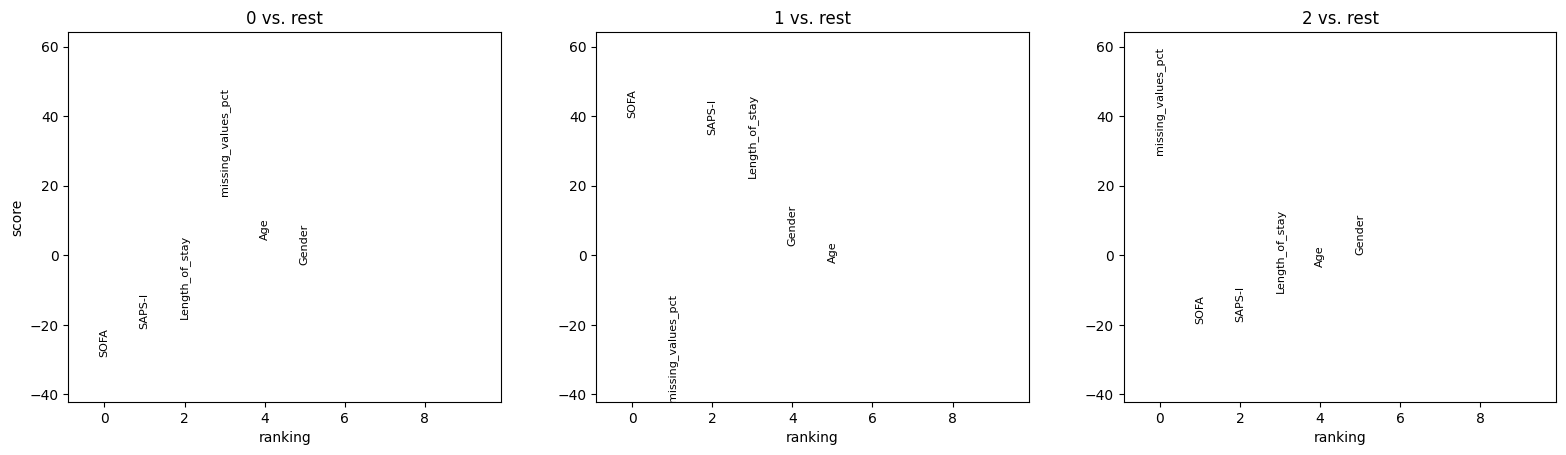

In [23]:
ep.tl.rank_features_groups(edata, field_to_rank="obs", columns_to_rank={"obs_names" : ["Age", "Gender", "SAPS-I", "SOFA", "Length_of_stay", "missing_values_pct"]}, groupby="hour_48_leiden", key_added="rank_features_groups")
ep.pl.rank_features_groups(edata, key="rank_features_groups", n_features=10, show=False)

We can observe that the Leiden clustering, defined entirely on dynamic variables at hour 48, subgrouped the patients into a group of low SOFA and SAPS-I score, a group of high SOFA and SAPS-I score, and a group of high missing value frequency.

## Part 2: Machine Learning with SAITS

Now that we've comprehensively explored the data, patient representations, and clustering patterns, we'll build a deep learning model to predict in-hospital mortality using the SAITS architecture from PyPOTS.

SAITS (Self-Attention-based Imputation for Time Series) is designed for classification on partially-observed time series data, making it ideal for clinical applications where missing values are common.


## 2.1 SAITS Model Setup

SAITS (Self-Attention-based Imputation for Time Series) is a powerful model for classification on partially-observed time series. In the PyPOTS implementation, it follows a unified classifier API shared with other models like BRITS, Raindrop, and iTransformer, and uses diagonal masked self-attention (DMSA) to handle missingness patterns.[[PyPOTS docs](https://docs.pypots.com/en/latest/pypots.classification.html)]

Key aspects of the setup:
1. Input format: \(X \in \mathbb{R}^{N \times T \times D}\) with missing values allowed
2. Unified training API: `fit(train_set, val_set)` where each set is a dict with keys `"X"` and `"y"`
3. Inference via `predict()` and `predict_proba()`, returning classification labels and probabilities


We start by splitting the data into training, validation, and test sets.


In [24]:
train_indices = np.arange(len(edata))
train_idx, temp_idx = train_test_split(train_indices, test_size=0.3, random_state=42,
                                        stratify=edata.obs['SepsisLabel'] if 'SepsisLabel' in edata.obs.columns else None)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, random_state=42,
                                    stratify=edata.obs.iloc[temp_idx]['SepsisLabel'] if 'SepsisLabel' in edata.obs.columns else None)

edata_train = edata[train_idx].copy()
edata_val = edata[val_idx].copy()
edata_test = edata[test_idx].copy()

# Track cohort changes
ct(edata_train, label="Training Set", operations_done="Split into train/val/test")


We configure SAITS for PhysioNet 2012 with:
- Sequence length: 48 hourly steps
- Number of features: 37 clinical variables
- Binary classification: in-hospital mortality vs. no in-hospital mortality
- DMSA architecture with 2 layers, `d_model=64`, `n_heads=4` (so `d_k=d_v=16`)
- Moderate number of epochs and batch size suitable for this dataset

In [25]:
# Initialize SAITS classifier
n_timesteps = edata_train.shape[2]
n_features = edata_train.shape[1]
n_classes = 2  # Binary classification: in-hospital death vs. no in-hospital death

# SAITS architecture: d_model must be divisible by n_heads, d_k = d_model / n_heads
d_model = 64
n_heads = 4
d_k = d_v = d_model // n_heads  # 16

# Initialize SAITS with PyPOTS defaults and reasonable training settings
saits = SAITS(
    n_steps=n_timesteps,
    n_features=n_features,
    n_classes=n_classes,
    # Architecture parameters required by SAITS
    n_layers=2,
    d_model=d_model,
    n_heads=n_heads,
    d_k=d_k,
    d_v=d_v,
    d_ffn=128,
    dropout=0.1,
    attn_dropout=0.1,
    diagonal_attention_mask=True,  # DMSA
    # Training configuration
    epochs=4,
    batch_size=32,
    patience=1,
    device="cuda" if torch.cuda.is_available() else "cpu",
    saving_path="./saits_model",  # Save model checkpoints
)

print(f"\nUsing device: {saits.device}")
print(f"Model initialized with {sum(p.numel() for p in saits.model.parameters())} parameters")


2026-01-28 01:41:41 [INFO]: Using the given device: cpu
2026-01-28 01:41:41 [INFO]: Model files will be saved to ./saits_model/20260128_T014141
2026-01-28 01:41:41 [INFO]: Tensorboard file will be saved to ./saits_model/20260128_T014141/tensorboard
2026-01-28 01:41:41 [INFO]: Using customized CrossEntropy as the training loss function.
2026-01-28 01:41:41 [INFO]: Using customized CrossEntropy as the validation metric function.
2026-01-28 01:41:41 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 155,416



Using device: cpu
Model initialized with 155416 parameters


Now, we can train the model

In [26]:
saits.fit(
    train_set={"X": edata_train.layers["norm_data"].transpose(0, 2, 1), "y": edata_train.obs["In-hospital_death"].values},
    val_set={"X": edata_val.layers["norm_data"].transpose(0, 2, 1), "y": edata_val.obs["In-hospital_death"].values}
)

2026-01-28 01:41:50 [INFO]: Epoch 001 - training loss (CrossEntropy): 0.3638, validation CrossEntropy: 0.3001
2026-01-28 01:41:57 [INFO]: Epoch 002 - training loss (CrossEntropy): 0.3231, validation CrossEntropy: 0.2932
2026-01-28 01:42:05 [INFO]: Epoch 003 - training loss (CrossEntropy): 0.3061, validation CrossEntropy: 0.2890
2026-01-28 01:42:13 [INFO]: Epoch 004 - training loss (CrossEntropy): 0.2961, validation CrossEntropy: 0.3069
2026-01-28 01:42:13 [INFO]: Exceeded the training patience. Terminating the training procedure...
2026-01-28 01:42:13 [INFO]: Finished training. The best model is from epoch#3.
2026-01-28 01:42:13 [INFO]: Saved the model to ./saits_model/20260128_T014141/SAITS.pypots


## 2.3 Model Evaluation

We now evaluate our prediction model using some classical performance reporting metrics.

In [27]:
# Evaluate the trained SAITS classifier on the test set
test_predictions = saits.predict({"X": edata_test.layers["norm_data"].transpose(0, 2, 1)})


Test Set Performance:
  ROC-AUC: 0.8376
  PR-AUC: 0.4841
  F1 Score: 0.4519
  Accuracy: 0.8638

Confusion Matrix:
  True Negatives: 1453, False Positives: 101
  False Negatives: 144, True Positives: 101


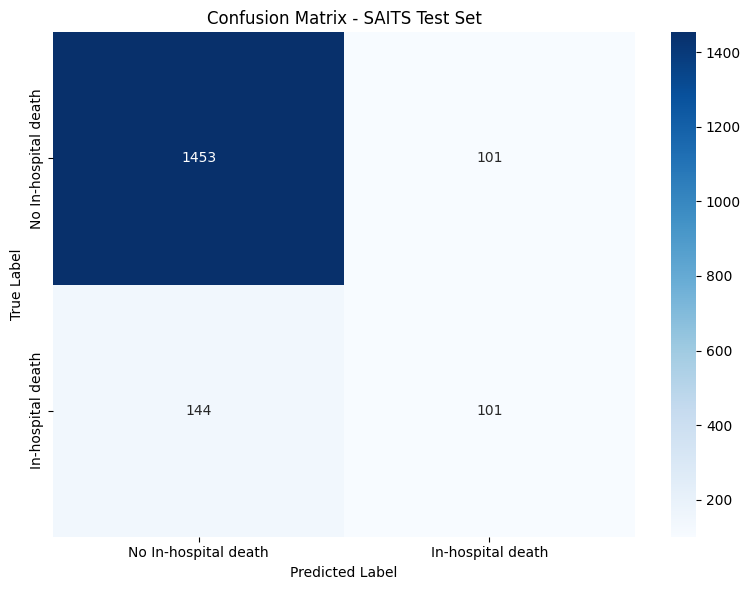

In [28]:
test_pred_labels = test_predictions["classification"]
test_pred_proba = test_predictions["classification_proba"]

y_test = edata_test.obs["In-hospital_death"]
# Calculate metrics
roc_auc = roc_auc_score(y_test, test_pred_proba[:, 1])
precision, recall, _ = precision_recall_curve(y_test, test_pred_proba[:, 1])
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, test_pred_labels)
accuracy = accuracy_score(y_test, test_pred_labels)

print(f"\nTest Set Performance:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC: {pr_auc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, test_pred_labels)
print(f"\nConfusion Matrix:")
print(f"  True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
print(f"  False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No In-hospital death', 'In-hospital death'],
            yticklabels=['No In-hospital death', 'In-hospital death'])
plt.title('Confusion Matrix - SAITS Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


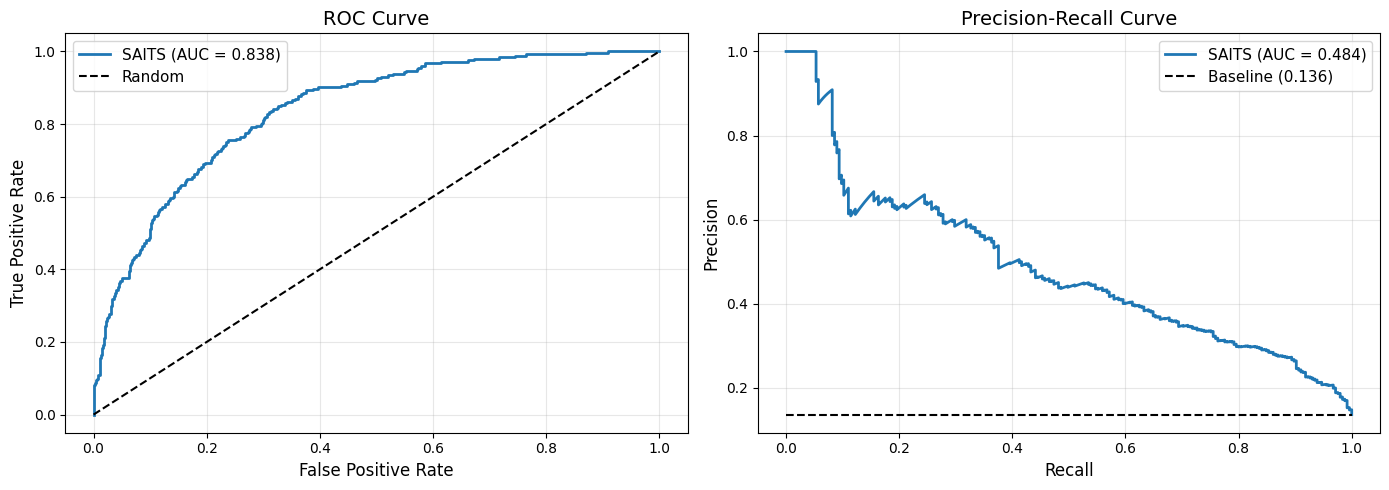

In [29]:
# Plot ROC and PR curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, test_pred_proba[:, 1])
ax1.plot(fpr, tpr, label=f'SAITS (AUC = {roc_auc:.3f})', linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', label='Random')
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC Curve', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3)

# PR Curve
ax2.plot(recall, precision, label=f'SAITS (AUC = {pr_auc:.3f})', linewidth=2)
baseline = y_test.mean()
ax2.plot([0, 1], [baseline, baseline], 'k--', label=f'Baseline ({baseline:.3f})')
ax2.set_xlabel('Recall', fontsize=12)
ax2.set_ylabel('Precision', fontsize=12)
ax2.set_title('Precision-Recall Curve', fontsize=14)
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


We can already get a rough impression: The label imbalance, much more non-mortal than mortal cases, makes the model lean towards predicting "no In-hospital death" in most cases.

## 2.4 Exploring SAITS Representations

While SAITS is trained in a supervised manner and outputs a label, we can extract representations for patient embeddings.

This is a supervised representation learning approach contrasted with the simple time-based cross-sections from Section 1.2.

In [32]:
# prepare data for PyPOTS' saits backbone
data = edata_test.layers["tem_data"].transpose(0, 2, 1).copy()
missing_mask = np.isnan(data)
data[missing_mask] = 0
data = torch.tensor(data, dtype=torch.float32)

# get the saits embedding
_, _, X_tilde_3, _, _, _ = saits.model.encoder(
    torch.tensor(data, dtype=torch.float32),
    torch.tensor(missing_mask, dtype=torch.float32),
    None,
)

We store the embedding again in the `.obsm` slot of our `EHRData` object.

In [38]:
edata_test.obsm["saits_embedding"] = X_tilde_3.mean(dim=1).detach().numpy()

And perform neighborhood graph construction, and subsequent leiden clustering and UMAP computation on this embedding:

In [39]:
ep.pp.neighbors(edata_test, use_rep='saits_embedding', key_added='saits_neighbors', n_neighbors=15)
ep.tl.leiden(edata_test, neighbors_key='saits_neighbors', key_added='saits_leiden', resolution=0.2)
ep.tl.umap(edata_test, neighbors_key='saits_neighbors')

We can visualize this in 2D, and compare also e.g. the leiden clustering from the 48h time cross-section from before with the newly computed leiden clustering on the SAITS embedding.

[<Axes: title={'center': 'UMAP: In-hospital_death'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'ICUType'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'In-hospital_death'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'hour_48_leiden'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'saits_leiden'}, xlabel='UMAP1', ylabel='UMAP2'>]

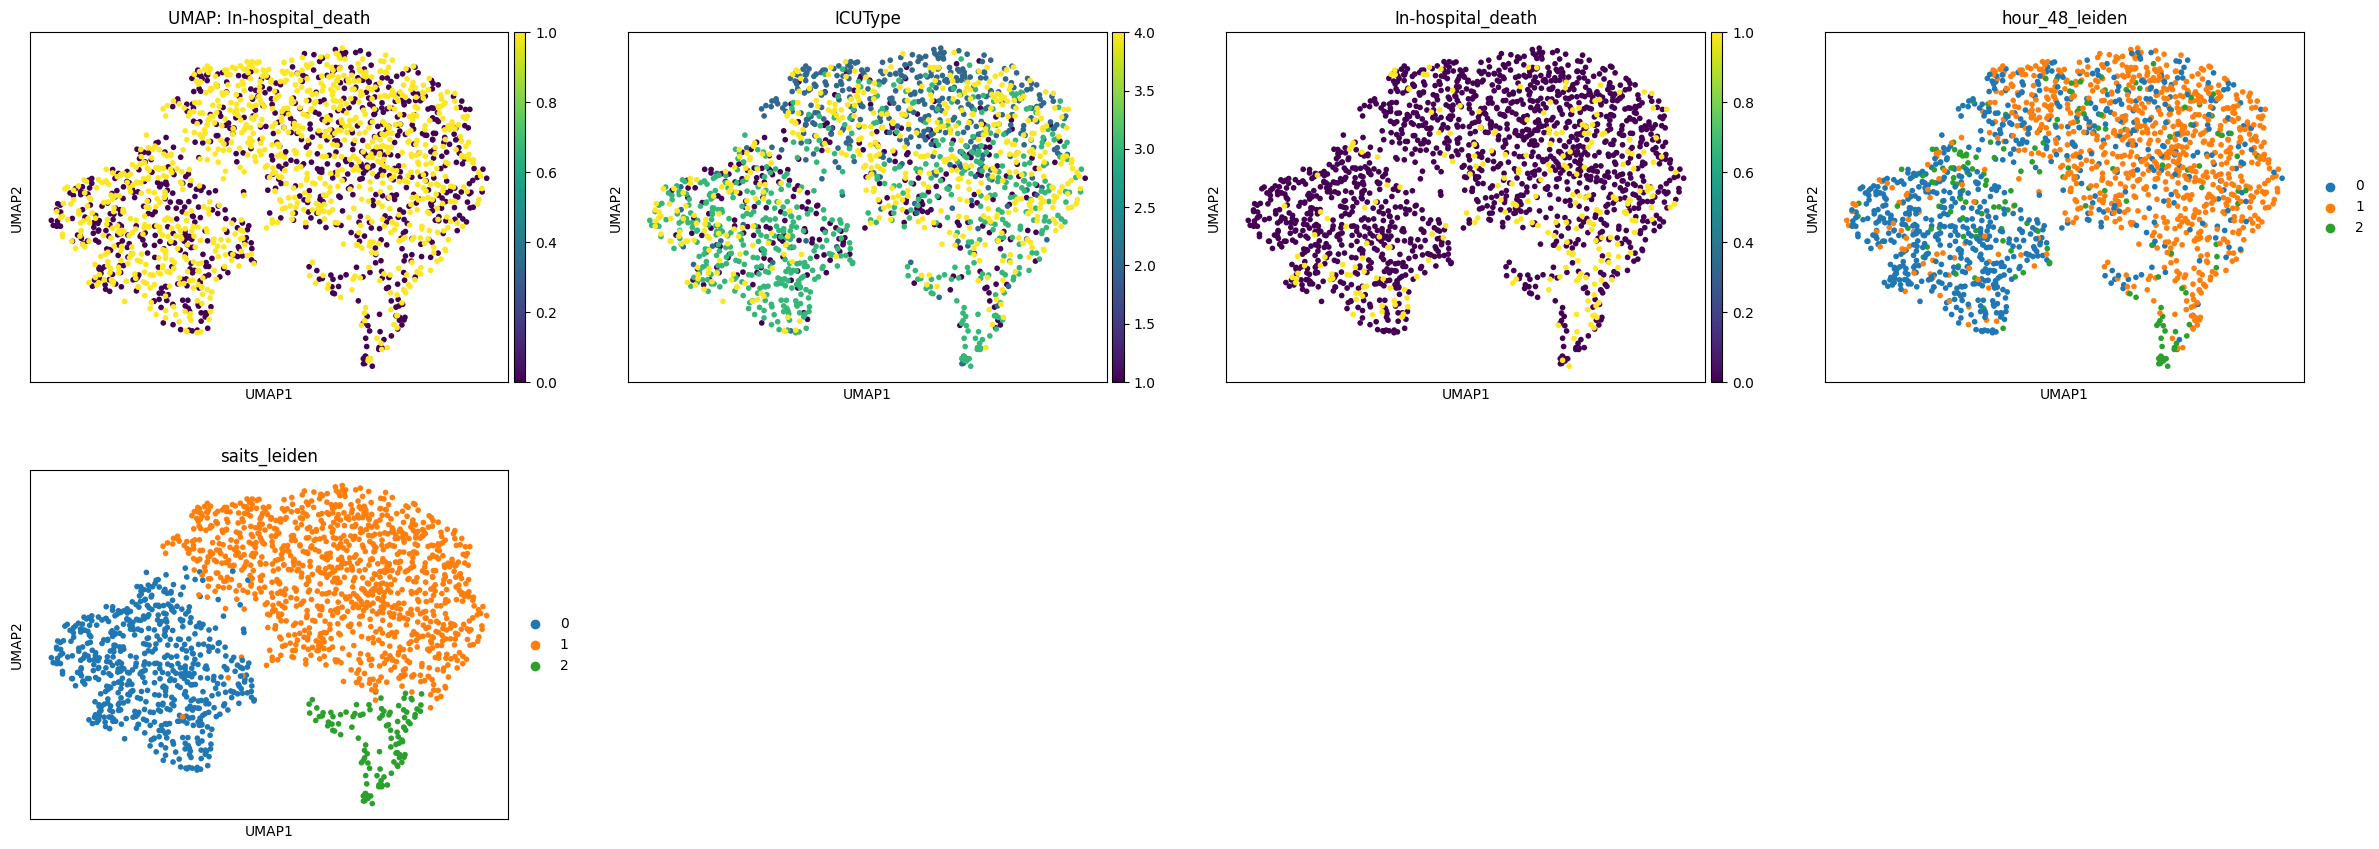

In [40]:
ep.pl.umap(edata_test, color=["Gender", "ICUType", "In-hospital_death", "hour_48_leiden", "saits_leiden"], title='UMAP: In-hospital_death', show=False)

We don't see clear cues from the static variables with the time-series information generated embedding.
We can as before again compare the Leiden cluster's based on e.g. their static information:

! Feature  was detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.


! Detected no columns that need to be encoded. Leaving passed EHRData/AnnData object unchanged.


[<Axes: title={'center': '0 vs. rest'}, xlabel='ranking', ylabel='score'>,
 <Axes: title={'center': '1 vs. rest'}, xlabel='ranking'>,
 <Axes: title={'center': '2 vs. rest'}, xlabel='ranking'>]

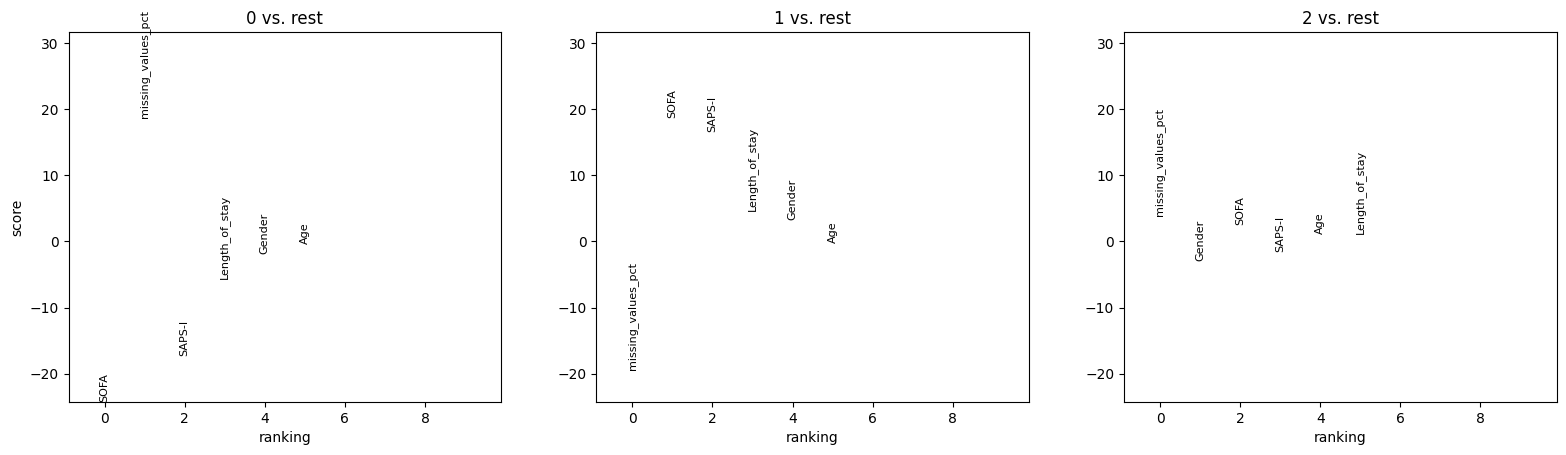

In [42]:
ep.tl.rank_features_groups(edata_test, field_to_rank="obs", columns_to_rank={"obs_names" : ["Age", "Gender", "SAPS-I", "SOFA", "Length_of_stay", "missing_values_pct"]}, groupby="saits_leiden", key_added="rank_features_groups")
ep.pl.rank_features_groups(edata_test, key="rank_features_groups", n_features=10, show=False)

We can find again that clusters are corresponding to particularly high (and low) fractions of missing values, and low vs high SOFA and SAPS-I scores.



## 2.5 Cohort Tracking Summary

Let's visualize how our cohort changed throughout the analysis pipeline.


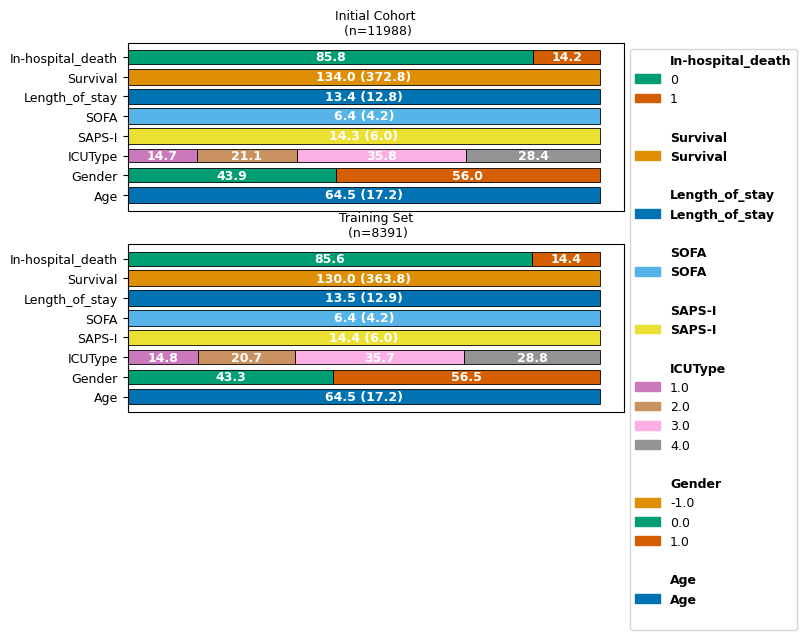

In [43]:
# Plot cohort tracking barplot
ct.plot_cohort_barplot(
    subfigure_title=True,
    show=True,
    fontsize=9
)


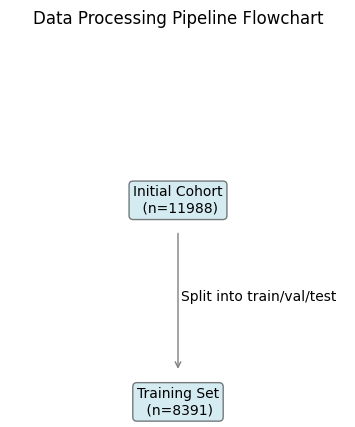

In [44]:
# Plot cohort tracking flowchart
ct.plot_flowchart(
    title="Data Processing Pipeline Flowchart",
    show=True
)

This concludes our walk-through of exploring this clinical longitudinal dataset and training a deep-learning classifier for predicting in-hospital mortality.

## 2.6 Summary and Next Steps

### What We've Accomplished

1. ✅ **Data Loading**: Loaded PhysioNet 2012 dataset with EHRData
2. ✅ **Comprehensive Inspections**: 
   - Cohort tracking with CohortTracker
   - Sankey diagrams for patient flow and temporal transitions
   - Time series visualizations
3. ✅ **Representation Learning**: Built time-based patient representations at multiple timesteps (24h, 48h)
4. ✅ **Leiden Clustering**: Performed clustering analysis to identify patient subgroups
5. ✅ **SAITS Training**: Trained SAITS model using the PyPOTS implementation
6. ✅ **Model Evaluation**: Evaluated performance on in-hospital mortality prediction

### Key Insights

- **Missing Data**: The dataset has significant missingness in clinical measurements, which SAITS handles effectively through its graph-based attention mechanism
- **Mortality Prediction**: SAITS learns to predict in-hospital mortality from partially-observed time series
- **Patient Clustering**: Leiden clustering reveals distinct patient subgroups with different clinical trajectories

### Next Steps

1. **Feature Importance**: Analyze which clinical variables are most predictive of mortality
2. **Trajectory Analysis**: Deeper analysis of how patient representations change over the 48-hour observation period
3. **Cluster Characterization**: Detailed characterization of patient clusters identified by Leiden
4. **External Validation**: Test the trained model on additional ICU datasets
5. **Clinical Interpretation**: Work with clinicians to interpret discovered patterns and validate clinical relevance
6. **Sensitivity Analyses**: Evaluate choices such as imputation and their effect on the results

### Resources

- **PhysioNet 2012 Challenge**: https://physionet.org/content/challenge-2012/1.0.0/
- **RAINDROP & other classifiers in PyPOTS**: https://docs.pypots.com/en/latest/pypots.classification.html
- **PyPOTS**: https://github.com/WenjieDu/PyPOTS
- **ehrapy Documentation**: https://ehrapy.readthedocs.io/
- **ehrdata Documentation**: https://ehrdata.readthedocs.io/
